In [1]:
import numpy as np
import matplotlib.pyplot as mp

In [2]:
# Isolated Reserve issue
# Assume we have 10 millions of USD for IR
# Consider the pair ETH-SHIB for Uniswap v2 liquidity pool

IR_USD_equivalent = 10e6

U_V2_SHIB_token_pooled = 65.94e9
U_V2_ETH_token_pooled = 483.8413

# Then divide IR USD for equal part for ETH and SHIB

ETH_price = 1363
Rh_ETH_token_pooled = IR_USD_equivalent/(2*ETH_price)

SHIB_price = 136292752/ETH_price
Rh_SHIB_token_pooled = IR_USD_equivalent/(2*SHIB_price)

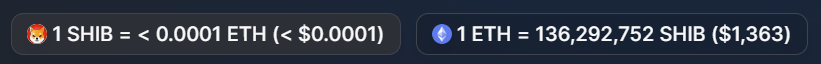
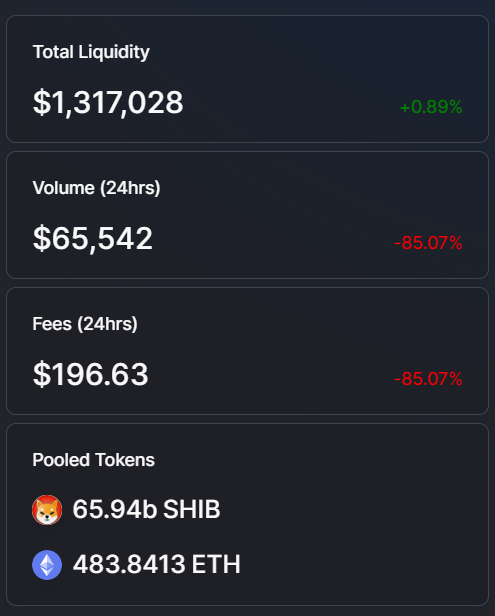

In [3]:
# Angeris formula for Cost of manipulation 

# Rb - Liqudity pool of tokens that will be put into protocol (in tokens B)
# C1 - Cost of manipulation FOR ONE BLOCK (in tokens B)


def Angeris_f(Rb, eps):
    C1 = Rb*(np.sqrt(1+eps)+(1/(np.sqrt(1+eps)))-2)
    return C1*144

In [4]:
# Lets Assume we somehow have initial value of Collateral Factor for given pair equal to 0.4
initial_CF = 0.4

# Alpha = (1+eps) - initial multiplier coefficient for new price (price that is desired by bad actor)
initial_alpha = 1/initial_CF
print("Initial alpha = ", initial_alpha)



Initial alpha =  2.5


In [5]:
                                                    ### SIMULATION ###

# We will consider a TWAP period of 144 blocks, so the real cost of attack will be C = TWAP_period*C1
TWAP_period = 144

def CostOfManipulation(Twap_p,C1):
    return C1*Twap_p

#####

# Now, the bound case is when the COST of Mani[ulation is equal to IR_size:


R_t = Rh_ETH_token_pooled/(np.sqrt(1+initial_alpha)+(1/(np.sqrt(1+initial_alpha)))-2) 
# We got the number of ETH that should be pooled in Uniswap V2 in the case that COA for ONE block for Rhezus would be equal to 
# full amount of ETH, pooled in Rhezus 



print(Rh_ETH_token_pooled, R_t)

3668.378576669112 9049.87769346522


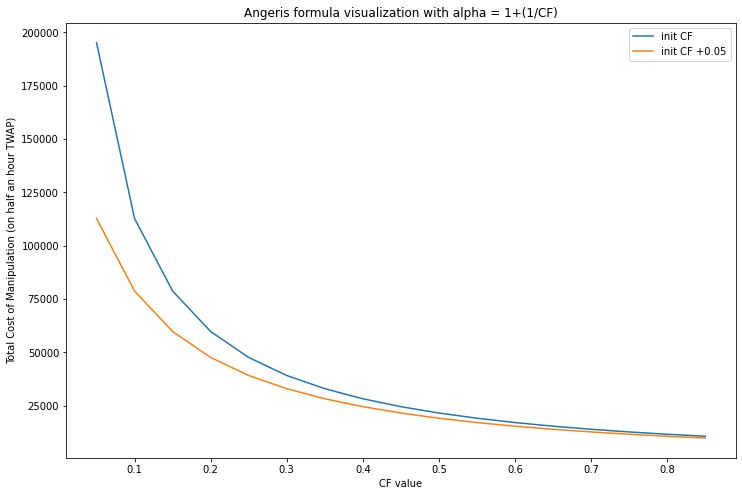

In [10]:
ar_CF = np.arange(0.05,0.9,0.05)
res = np.zeros(ar_CF.shape[0])
res1 = np.zeros(ar_CF.shape[0])

for i in range(ar_CF.shape[0]):
    res[i] = Angeris_f(U_V2_ETH_token_pooled,1/ar_CF[i])
    res1[i] = Angeris_f(U_V2_ETH_token_pooled,1/(ar_CF[i]+0.05))

mp.rcParams['figure.figsize'] = [12, 8]
fig, ax = mp.subplots()

Init, = ax.plot(ar_CF, res , label = "init CF")
Init2, = ax.plot(ar_CF, res1, label = "init CF +0.05")

mp.title("Angeris formula visualization with alpha = 1+(1/CF)")
mp.xlabel("CF value")
mp.ylabel("Total Cost of Manipulation (on half an hour TWAP)")
ax.legend(handles = [Init, Init2])
mp.show()

In [7]:
def alpha_calc(IR,pool):
    b = -(((IR/(144*pool))-2)**2)
    D = (b**2)-4
    x1 = (-b+np.sqrt(D))/2
    x2 = (-b-np.sqrt(D))/2
    x = max(x1,x2)
    return 1/(x-1)

In [8]:
print(alpha_calc(1e6,483.223))

0.006577324743097593


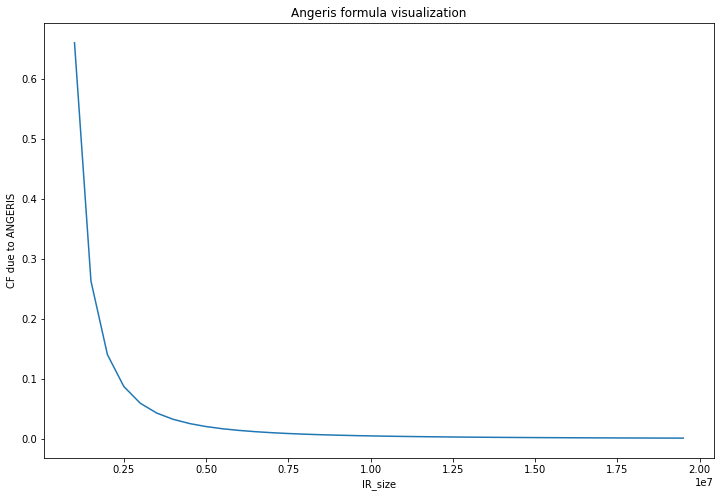

In [9]:
IR_size_ar = np.arange(1e6,20e6,5e5)
result = np.zeros(IR_size_ar.shape[0])

for i in range(IR_size_ar.shape[0]):
    result[i] = alpha_calc(IR_size_ar[i],U_V2_ETH_token_pooled)
    
mp.rcParams['figure.figsize'] = [12, 8]
mp.title("Angeris formula visualization")
mp.xlabel("IR_size")
mp.ylabel("CF due to ANGERIS")
mp.plot(IR_size_ar, result*100)